# 過去ログからより良いエントリポイントを探求

### システムパスに一つ上のディレクトリ .. を追加

In [1]:
import sys
sys.path.append('..')

## ライブラリのインポート

In [2]:
import datetime
import re

from matplotlib import (
    dates as mdates,
    font_manager as fm,
    pyplot as plt,
    ticker as ticker,
)
import numpy as np
import pandas as pd

from funcs.plots import getMajorXTicks
from funcs.preprocs_no_qt import (
    get_date_formatted,
    get_ohlc4analysis,
    get_tick4analysis,
)

## 過去ログ (OHLC) の読み込み

In [3]:
dateStr = '20250306'
#ohlc_csv = '../ohlc1m/ohlc1m_7203_%s.csv' % dateStr
ohlc_csv = '../ohlc1m/ohlc1m_8306_%s.csv' % dateStr
df = pd.read_csv(ohlc_csv)
df

,銘柄名称,市場名称,足種,日付,時刻,始値,高値,安値,終値,出来高,...,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
0,三菱ＵＦＪフィナンシャルＧ,東証,1M,2025/03/05,15:30,1927.5,1927.5,1927.5,1927.5,6089900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2025/03/06,09:00,1935.0,1942.5,1935.0,1941.5,3095900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2025/03/06,09:01,1941.5,1944.0,1941.5,1942.5,489600,...,1938.5,1942.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2025/03/06,09:02,1942.0,1943.0,1937.5,1937.5,623300,...,1937.5,1940.00,-1.0,1937.5,0.02,1937.5,0.0,0.0,NaN,4.0
4,NaN,NaN,NaN,2025/03/06,09:03,1937.5,1942.0,1937.5,1938.5,703800,...,1937.5,1938.88,1.0,1942.0,0.02,1937.5,0.0,0.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,NaN,NaN,NaN,2025/03/06,15:27,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,2025/03/06,15:28,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,2025/03/06,15:29,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,2025/03/06,15:30,1954.5,1954.5,1954.5,1954.5,8153400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## OHLC データを Matplotlib で扱いやすいように整形

In [4]:
df = get_ohlc4analysis(df)
df

,Open,High,Low,Close,Volume,H_Open,H_High,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
2025-03-06 09:00:00,1935.0,1942.5,1935.0,1941.5,3095900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 09:01:00,1941.5,1944.0,1941.5,1942.5,489600.0,1938.50,1944.0,1938.5,1942.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 09:02:00,1942.0,1943.0,1937.5,1937.5,623300.0,1940.44,1943.0,1937.5,1940.00,-1.0,1937.5,0.02,1937.50,0.0,0.0,NaN,4.00
2025-03-06 09:03:00,1937.5,1942.0,1937.5,1938.5,703800.0,1940.22,1942.0,1937.5,1938.88,1.0,1942.0,0.02,1937.50,0.0,0.0,NaN,3.00
2025-03-06 09:04:00,1938.5,1940.5,1938.5,1938.5,331700.0,1939.55,1940.5,1938.5,1939.00,1.0,1942.0,0.02,1937.59,1.0,0.0,0.0,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-06 15:26:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 15:27:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 15:28:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 15:29:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 過去ログ (Tick) の読み込み

In [5]:
tick_csv = '../tick/tick_8306_%s.csv' % dateStr
df_tick = pd.read_csv(tick_csv)
df_tick

,Time,Price
0,09:00:00,1935.5
1,09:00:01,1935.5
2,09:00:03,1939.5
3,09:00:05,1939.0
4,09:00:07,1937.5
...,...,...
6608,15:24:53,1955.0
6609,15:24:55,1955.0
6610,15:24:57,1955.0
6611,15:24:59,1955.0


## Tick データを Matplotlib で扱いやすいように整形

In [6]:
dateFmt = get_date_formatted(dateStr)
df_tick = get_tick4analysis(df_tick, dateFmt)
df_tick

,Price
Datetime,
2025-03-06 09:00:00,1935.5
2025-03-06 09:00:01,1935.5
2025-03-06 09:00:03,1939.5
2025-03-06 09:00:05,1939.0
2025-03-06 09:00:07,1937.5
...,...
2025-03-06 15:24:53,1955.0
2025-03-06 15:24:55,1955.0
2025-03-06 15:24:57,1955.0


## ポジション・オープン条件

In [7]:
def timing_position_open(df: pd.DataFrame) -> pd.DataFrame:
    price_delta_min = 0.5
    level_slope = 2
    level_iqr = 4
    return df[(price_delta_min * level_slope < df['Slope']) & (price_delta_min * level_iqr < df['IQR'])]

timing_position_open(df)

,Open,High,Low,Close,Volume,H_Open,H_High,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
2025-03-06 09:24:00,1944.0,1947.5,1943.5,1947.0,462000.0,1940.57,1947.50,1940.57,1945.50,1.0,1947.5,0.08,1938.26,4.0,6.5,3.0,5.13
2025-03-06 09:39:00,1956.0,1957.0,1954.5,1955.0,138000.0,1958.61,1958.61,1954.50,1955.63,-1.0,1954.5,0.04,1960.74,1.0,1.5,1.5,3.00
2025-03-06 09:55:00,1944.5,1944.5,1942.0,1942.5,94600.0,1946.28,1946.28,1942.00,1943.38,-1.0,1942.0,0.18,1947.60,17.0,14.0,2.0,3.50
2025-03-06 09:59:00,1939.5,1939.5,1937.0,1938.0,188200.0,1941.59,1941.59,1937.00,1938.50,-1.0,1937.0,0.22,1942.58,21.0,18.5,1.5,2.50


## チャート

### フォント設定

In [8]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14

### 多段プロット

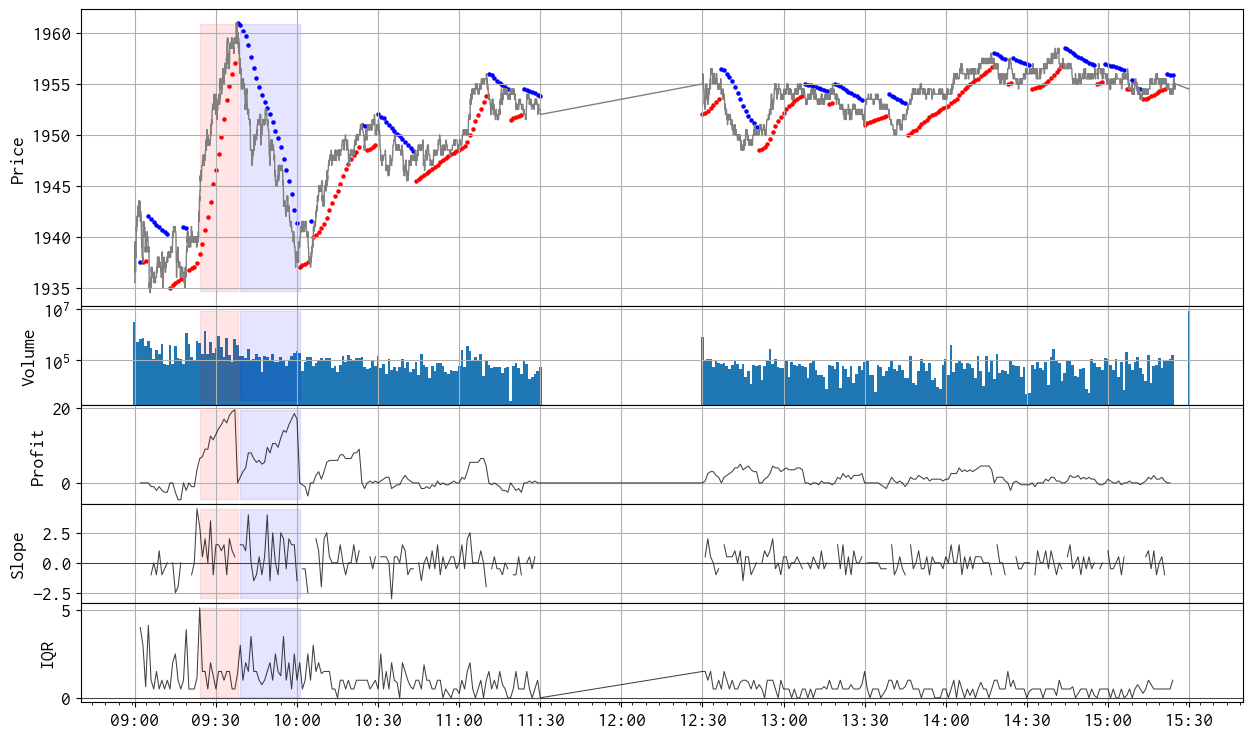

In [9]:
fig = plt.figure(figsize=(15, 9))

n = 5
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
ax = dict()
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Tick
ax[0].plot(df_tick, linewidth=1, color='gray',)

# PSAR bear - Downward trend
df_bear = df[df['TREND'] < 0]
ax[0].scatter(x=df_bear.index, y=df_bear['PSAR'], color='blue', s=5,)

# PSAR bull - Upward trend
df_bull = df[df['TREND'] > 0]
ax[0].scatter(x=df_bull.index, y=df_bull['PSAR'], color='red', s=5,)

tick_position, tick_labels = getMajorXTicks(df)
ax[0].set_xticks(ticks=tick_position, labels=tick_labels,)
ax[0].xaxis.set_minor_locator(mdates.MinuteLocator(interval=5))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[0].set_ylabel('Price')

td = datetime.timedelta(minutes=1)
ax[1].bar(
    df.index,
    df['Volume'],
    width=td,
)
ax[1].set_yscale('log')
ax[1].set_ylabel('Volume')

# Diff
ax[2].plot(
    df['Diff'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[2].set_ylabel('Profit')

# Slope
ax[3].plot(
    df['Slope'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[3].axhline(
    0,
    linewidth=0.75,
    color='#444',
)
ax[3].set_ylabel('Slope')

# IQR
ax[4].plot(
    df['IQR'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[4].axhline(
    0,
    linewidth=0.75,
    color='#444',
)
ax[4].set_ylabel('IQR')

# 売買タイミング
df_position = timing_position_open(df)
position = False
trend = None
t0 = None

for t in df.index:
    if position:
        if trend != df.at[t, 'TREND']:
            if trend == 1:
                fcolor = 'red'
            elif trend == -1:
                fcolor = 'blue'
            else:
                fcolor = 'gray'

            for i in ax.keys():
                ax[i].fill_between(
                    [t0, t], 0.05, 0.95,
                    color=fcolor,
                    alpha=0.1,
                    transform=ax[i].get_xaxis_transform(),
                )
            position = False 
    else:
        if t in df_position.index:
            t0 = t
            trend = df.at[t, 'TREND']
            position = True

plt.show()

# シンプルな売買シミュレーション

### 時間定数

In [44]:
dt_start = pd.to_datetime('%s 09:00:00' % dateFmt)
dt_end = pd.to_datetime('%s 15:30:00' % dateFmt)
td = datetime.timedelta(seconds=1)

### トレンド

In [40]:
trend = np.float64('nan')
#df.at[pd.to_datetime('2025-03-06 09:00:00'), 'TREND']

np.float64(nan)

### ループ

In [46]:
t = dt_start
while t <= dt_end:
    if t in df_tick.index:
        # 現在価格の更新
        price = df_tick.at[t, 'Price']

    if t in df.index:
        trend_new = df.at[t, 'TREND']
        if np.isnan(trend_new):
            # nan だったら何もしない
            pass
        elif t.second == 0:
            # トレンドが更新されるのは分単位（= 0 秒）
            if trend != trend_new:
                # トレンド反転
                trend = trend_new
                print(t, price, trend)
        else:
            pass

    t += td

2025-03-06 09:03:00 1937.5 1.0
2025-03-06 09:05:00 1938.5 -1.0
2025-03-06 09:13:00 1938.5 1.0
2025-03-06 09:18:00 1936.0 -1.0
2025-03-06 09:20:00 1940.0 1.0
2025-03-06 09:38:00 1960.0 -1.0
2025-03-06 10:01:00 1939.5 1.0
2025-03-06 10:05:00 1937.5 -1.0
2025-03-06 10:06:00 1940.0 1.0
2025-03-06 10:24:00 1951.0 -1.0
2025-03-06 10:26:00 1950.5 1.0
2025-03-06 10:30:00 1950.5 -1.0
2025-03-06 10:44:00 1948.0 1.0
2025-03-06 11:11:00 1953.5 -1.0
2025-03-06 11:19:00 1954.5 1.0
2025-03-06 11:24:00 1952.0 -1.0
2025-03-06 12:30:00 1955.0 1.0
2025-03-06 12:37:00 1954.0 -1.0
2025-03-06 12:51:00 1950.5 1.0
2025-03-06 13:08:00 1954.0 -1.0
2025-03-06 13:17:00 1953.5 1.0
2025-03-06 13:19:00 1954.0 -1.0
2025-03-06 13:30:00 1951.5 1.0
2025-03-06 13:39:00 1952.0 -1.0
2025-03-06 13:46:00 1953.0 1.0
2025-03-06 14:18:00 1956.5 -1.0
2025-03-06 14:23:00 1956.5 1.0
2025-03-06 14:25:00 1955.5 -1.0
2025-03-06 14:32:00 1956.0 1.0
2025-03-06 14:44:00 1957.0 -1.0
2025-03-06 14:56:00 1956.0 1.0
2025-03-06 14:59:00 1956